In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from geopy.distance import geodesic

In [34]:
DATA_PATH = "../data"

In [35]:
def plot_bars(attribute: str, figsize: tuple[int]=(10, 4), data=None) -> None:
    sns.set_theme(style="darkgrid")
    fig, axes = plt.subplots(1, 2, figsize=figsize)  # 1 row, 2 columns
    grouped = data.groupby([attribute, 'DELAYED']).size().unstack()
    grouped.plot.bar(stacked=True, ax=axes[0], title=f"Delayed shipments by {attribute} (Counts)")
    axes[0].set_ylabel('Count')
    grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0) * 100
    grouped_normalized.plot.bar(stacked=True, ax=axes[1], title=f"Delayed shipments by {attribute} (%)")
    axes[1].set_ylabel('Percentage')
    plt.tight_layout()
    plt.show()


In [25]:
def distplots(feature: str, data=None):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.histplot(data=data, x=feature, kde=True, fill=True, hue="DELAYED", ax=axes[0])
    sns.boxplot(data=data, x="DELAYED", y=feature, ax=axes[1])
    plt.show()


In [36]:
date_cols = [
    "FIRST_COLLECTION_SCHEDULE_EARLIEST",
    "FIRST_COLLECTION_SCHEDULE_LATEST",
    "LAST_DELIVERY_SCHEDULE_EARLIEST",
    "LAST_DELIVERY_SCHEDULE_LATEST",
]

shipment_bookings = pd.read_csv(f"{DATA_PATH}/Shipment_bookings.csv", parse_dates=date_cols)
shipment_bookings.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06 09:45:00+00:00,2023-10-06 10:00:00+00:00,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231210-272018,CAUK000435,Tractor Unit,Box 44ft,BD5 8LZ,EN3 7QP,53.767302,-1.746560,51.660700,-0.022247,2023-12-14 01:20:00+00:00,2023-12-14 03:00:00+00:00,2023-12-14 07:03:00+00:00,2023-12-14 10:43:00+00:00
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,-0.634948,2023-12-13 09:00:00+00:00,2023-12-13 09:30:00+00:00,2023-12-13 15:30:00+00:00,2023-12-13 16:00:00+00:00
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,-4.168719,2023-11-07 14:00:00+00:00,2023-11-07 15:00:00+00:00,2023-11-07 23:00:00+00:00,2023-11-07 23:59:00+00:00


In [37]:
shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"].min()

Timestamp('2023-09-29 14:00:00+0000', tz='UTC')

In [38]:
shipment_bookings.columns

Index(['PROJECT_ID', 'SHIPMENT_NUMBER', 'CARRIER_DISPLAY_ID', 'VEHICLE_SIZE',
       'VEHICLE_BUILD_UP', 'FIRST_COLLECTION_POST_CODE',
       'LAST_DELIVERY_POST_CODE', 'FIRST_COLLECTION_LATITUDE',
       'FIRST_COLLECTION_LONGITUDE', 'LAST_DELIVERY_LATITUDE',
       'LAST_DELIVERY_LONGITUDE', 'FIRST_COLLECTION_SCHEDULE_EARLIEST',
       'FIRST_COLLECTION_SCHEDULE_LATEST', 'LAST_DELIVERY_SCHEDULE_EARLIEST',
       'LAST_DELIVERY_SCHEDULE_LATEST'],
      dtype='object')

In [39]:
shipment_bookings.shape

(3245, 15)

In [40]:
gps = pd.read_csv(f"{DATA_PATH}/GPS_data.csv", parse_dates=["RECORD_TIMESTAMP"])

In [41]:
gps.head()

,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP
0,SEZHUK-230918-245388,53.291931,-1.072948,2023-10-09 19:25:00+01:00
1,SEZHUK-230918-245388,53.400404,-1.078563,2023-10-09 19:40:00+01:00
2,SEZHUK-230918-245388,53.574182,-1.215761,2023-10-09 19:55:00+01:00
3,SEZHUK-230918-245388,53.706805,-1.336503,2023-10-09 20:10:00+01:00
4,SEZHUK-230918-245388,53.747501,-1.640298,2023-10-09 20:25:00+01:00


Assuming that the delivery is considered "delivered" at the latest timestamp in the GPS data for its shipment number, we want to calculate whether the maximum `RECORD_TIMESTAMP` in the GPS data is greater than `LAST_DELIVERY_SCHEDULE_LATEST` for each shipment.

In [42]:
latest_gps = gps.sort_values(by="RECORD_TIMESTAMP", ascending=False).drop_duplicates(
    subset=["SHIPMENT_NUMBER"],
    keep="first",
)
latest_gps.head()

,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP
390552,SEZHUK-231127-266808,52.129432,-1.002753,2023-12-30 23:59:00+00:00
632889,SEZHUK-231226-276773,55.074868,-3.305964,2023-12-30 23:59:00+00:00
587908,SEZHUK-231217-275034,53.763930,-1.740779,2023-12-30 23:52:00+00:00
390144,SEZHUK-231127-266800,53.763930,-1.740779,2023-12-30 23:52:00+00:00
603621,SEZHUK-231219-275529,53.477451,-1.472694,2023-12-30 23:45:00+00:00


In [43]:
# Filter data to shipments  between October 1st and December 31st, 2023

shipment_bookings = shipment_bookings[
    shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"].between(
        "2023-10-01 00:00:00", "2024-12-31 23:59:59"
    )
]
print(f"Earliest collection date: {shipment_bookings['FIRST_COLLECTION_SCHEDULE_EARLIEST'].min()}")
print(f"Latest collection date: {shipment_bookings['FIRST_COLLECTION_SCHEDULE_EARLIEST'].max()}")

Earliest collection date: 2023-10-01 00:30:00+00:00
Latest collection date: 2023-12-31 00:30:00+00:00


In [44]:
shipment_bookings = shipment_bookings.merge(
    latest_gps[["SHIPMENT_NUMBER", "RECORD_TIMESTAMP"]].rename(
        {"RECORD_TIMESTAMP": "LATEST_GPS_TIMESTAMP"}, axis=1
    ),
    on="SHIPMENT_NUMBER",
    how="left",
)
shipment_bookings.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,LATEST_GPS_TIMESTAMP
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06 09:45:00+00:00,2023-10-06 10:00:00+00:00,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00,2023-10-06 10:24:00+01:00
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,2023-12-20 04:08:00+00:00
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231210-272018,CAUK000435,Tractor Unit,Box 44ft,BD5 8LZ,EN3 7QP,53.767302,-1.746560,51.660700,-0.022247,2023-12-14 01:20:00+00:00,2023-12-14 03:00:00+00:00,2023-12-14 07:03:00+00:00,2023-12-14 10:43:00+00:00,2023-12-14 10:18:00+00:00
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,-0.634948,2023-12-13 09:00:00+00:00,2023-12-13 09:30:00+00:00,2023-12-13 15:30:00+00:00,2023-12-13 16:00:00+00:00,2023-12-13 17:22:00+00:00
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,-4.168719,2023-11-07 14:00:00+00:00,2023-11-07 15:00:00+00:00,2023-11-07 23:00:00+00:00,2023-11-07 23:59:00+00:00,2023-11-08 03:53:00+00:00


In [45]:
# Adding the delayed column
shipment_bookings["DELAYED"] = (
    shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"] + pd.Timedelta("30 minutes")
    < shipment_bookings["LATEST_GPS_TIMESTAMP"]
)

In [46]:
# Check null counts
shipment_bookings.isnull().sum()

PROJECT_ID                            0
SHIPMENT_NUMBER                       0
CARRIER_DISPLAY_ID                    0
VEHICLE_SIZE                          0
VEHICLE_BUILD_UP                      0
FIRST_COLLECTION_POST_CODE            1
LAST_DELIVERY_POST_CODE               4
FIRST_COLLECTION_LATITUDE             0
FIRST_COLLECTION_LONGITUDE            0
LAST_DELIVERY_LATITUDE                0
LAST_DELIVERY_LONGITUDE               0
FIRST_COLLECTION_SCHEDULE_EARLIEST    0
FIRST_COLLECTION_SCHEDULE_LATEST      0
LAST_DELIVERY_SCHEDULE_EARLIEST       0
LAST_DELIVERY_SCHEDULE_LATEST         0
LATEST_GPS_TIMESTAMP                  0
DELAYED                               0
dtype: int64

It seems there are no missing records in the GPS data as the DELAYED attribute is never null following the LEFT merge. Only postcodes are occasionally missing. Nice.

In [47]:
# Quick check of unique counts
shipment_bookings.select_dtypes(include="object").nunique()

PROJECT_ID                      49
SHIPMENT_NUMBER               3244
CARRIER_DISPLAY_ID              92
VEHICLE_SIZE                     6
VEHICLE_BUILD_UP                13
FIRST_COLLECTION_POST_CODE     154
LAST_DELIVERY_POST_CODE        432
LATEST_GPS_TIMESTAMP          3097
dtype: int64

In [48]:
# Summary statistcs for numerical columns
shipment_bookings.select_dtypes(include="number").describe().T

,count,mean,std,min,25%,50%,75%,max
FIRST_COLLECTION_LATITUDE,3244.0,53.000927,0.854703,50.386450,52.322608,53.304842,53.634051,55.932081
FIRST_COLLECTION_LONGITUDE,3244.0,-1.580715,0.879247,-6.104285,-2.120660,-1.630808,-1.074008,1.397815
LAST_DELIVERY_LATITUDE,3244.0,52.465805,1.099989,50.228709,51.558294,52.371656,53.207122,57.653603
LAST_DELIVERY_LONGITUDE,3244.0,-1.511380,1.572387,-8.687242,-1.983264,-1.231993,-0.515011,1.457581


### Percentage of shipments delayed

In [49]:
delayed = round(shipment_bookings["DELAYED"].mean(), 2)
print(f"{delayed * 100}% of shipments are delayed.")

37.0% of shipments are delayed.


### Distance calculations

Here, the straight line distance is used in lieu of an estimated journey time from an API such as distancematrix.ai or the Google Maps API.

Ideally something like the below would be used instead. This would likely yield a much better predictor of delay.

```python
import requests
from config import DISTANCEMATRIX_API_KEY

def get_journey_time(lat1, lon1, lat2, lon2) -> dict:
    response = requests.get(f"https://distancematrix.ai/distancematrixaccurate?lat1={lat1}&lon1={lon1}&lat2={lat2}&lon2={lon2}&key={DISTANCEMATRIX_API_KEY}")
    distance = response.json()["distance"]["value"]
    journey_time = response.json()["journey_time"]["value"]

    return {"distance": distance, "journey_time": journey_time}


data["JOURNEY_TIME"] = data.apply(lambda row: get_journey_time(
    row["FIRST_COLLECTION_LATITUDE"],
    row["FIST_COLLECTION_LONGITUDE"],
    row["LAST_DELIVERY_LATITUDE"],
    row["LAST_DELIVERY_LONGITUDE"]
    )["journey_time"],
    axis=1
)
```

In [ ]:
# Calculate distance between lat/lon coordinates.

shipment_bookings["DISTANCE"] = shipment_bookings.apply(
    lambda x: geodesic(
        (x["FIRST_COLLECTION_LATITUDE"], x["FIRST_COLLECTION_LONGITUDE"]),
        (x["LAST_DELIVERY_LATITUDE"], x["LAST_DELIVERY_LONGITUDE"])
    ).kilometers,
    axis=1
)

In [ ]:
shipment_bookings["DISTANCE"].describe()

count    3244.000000
mean      186.866699
std       106.597884
min         0.000000
25%       108.959603
50%       184.080096
75%       246.302167
max       549.748940
Name: DISTANCE, dtype: float64

### Exploratory Analysis

#### Time feature engineering

Add features for duration and windows etc from collection/delivery datetimes.

In [ ]:
# Extracting day of the week from the earliest collection date
shipment_bookings["COLLECTION_DAY"] = shipment_bookings[
    "FIRST_COLLECTION_SCHEDULE_EARLIEST"
].dt.day_name()
# Extracting day of the week from the latest delivery date
shipment_bookings["DELIVERY_DAY"] = shipment_bookings[
    "LAST_DELIVERY_SCHEDULE_LATEST"
].dt.day_name()
# Extracting the hour of the day from the latest delivery date
shipment_bookings["DELIVERY_HOUR"] = shipment_bookings[
    "LAST_DELIVERY_SCHEDULE_LATEST"
].dt.hour

print(f"Min booking hour: {shipment_bookings['DELIVERY_HOUR'].min()}")
print(f"Max booking hour: {shipment_bookings['DELIVERY_HOUR'].max()}")
      # Durations
# Delivery window duration
shipment_bookings["DELIVERY_WINDOW_DURATION"] = (
    shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"]
    - shipment_bookings["LAST_DELIVERY_SCHEDULE_EARLIEST"]
).dt.total_seconds() / 3600

# Shipment duration
shipment_bookings["SHIPMENT_DURATION"] = (
    shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"]
    - shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"]
).dt.total_seconds() / 3600

shipment_bookings["DURATION_PER_DISTANCE"] = (
    shipment_bookings["SHIPMENT_DURATION"].div(shipment_bookings["DISTANCE"])
)

Min booking hour: 0
Max booking hour: 23


In [50]:
shipment_bookings["DELAYED"] = shipment_bookings["DELAYED"].astype(int)

In [51]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    shipment_bookings.drop("DELAYED", axis=1),
    shipment_bookings["DELAYED"],
    test_size=0.2,
    random_state=101,
)

In [52]:
X_train = pd.concat([X_train, y_train], axis=1)

In [53]:
# Vehicle sizes
X_train["VEHICLE_SIZE"].unique()

array(['Tractor Unit', '3.5T Van', '3.5 T Van', '26T Rigid', '18T Rigid',
       '7.5T Rigid'], dtype=object)

In [54]:
# Clean up VEHICLE_SIZE column
def clean_vehicle_size(vehicle_size: pd.Series) -> pd.Series:
    return vehicle_size.str.replace(" ", "")

X_train["VEHICLE_SIZE"] = clean_vehicle_size(X_train["VEHICLE_SIZE"])
X_train["VEHICLE_SIZE"].unique()

array(['TractorUnit', '3.5TVan', '26TRigid', '18TRigid', '7.5TRigid'],
      dtype=object)

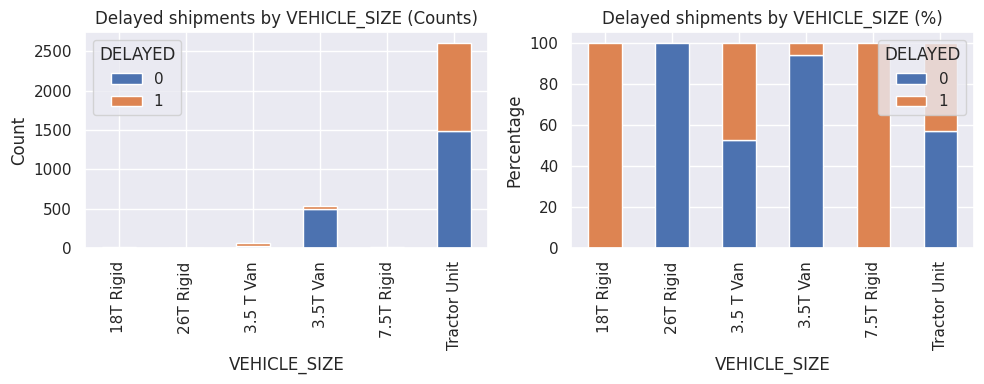

In [55]:
plot_bars("VEHICLE_SIZE", data=shipment_bookings)
plt.show()

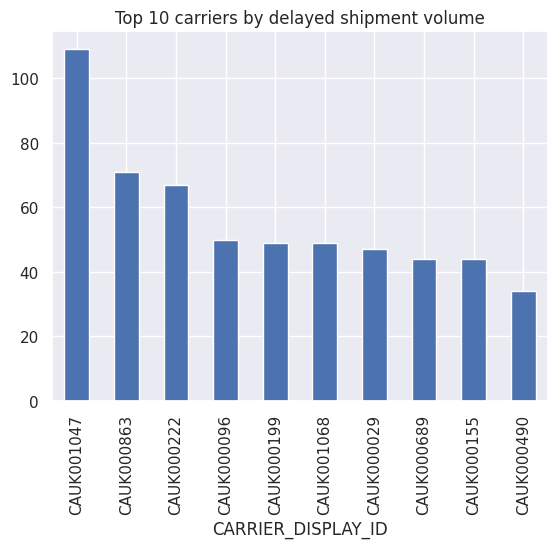

In [56]:
carrier_share = (
    X_train.groupby("CARRIER_DISPLAY_ID")["DELAYED"]
    .sum()
    .sort_values(ascending=False)
)
carrier_share[:10].plot.bar(title="Top 10 carriers by delayed shipment volume")
plt.show()

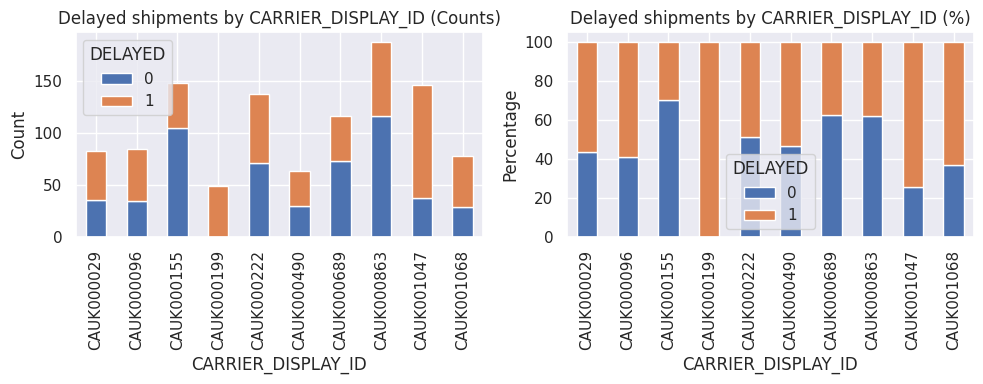

In [32]:
plot_bars(
    "CARRIER_DISPLAY_ID",
    data=X_train[
        X_train["CARRIER_DISPLAY_ID"].isin(carrier_share[:10].index)
    ],
)

In [20]:
shipment_bookings["VEHICLE_BUILD_UP"].unique()

array(['Curtain-Side 13.6M Trailer', 'Box 44ft', 'Curtain Side',
       'LWB Van', 'Box', 'Tractor Only', 'Tractor Only 6x2',
       'Temperature-Controlled', 'Double Deck Trailer', '40ft Container',
       'High Security', 'Box 40ft', '20ft Container'], dtype=object)

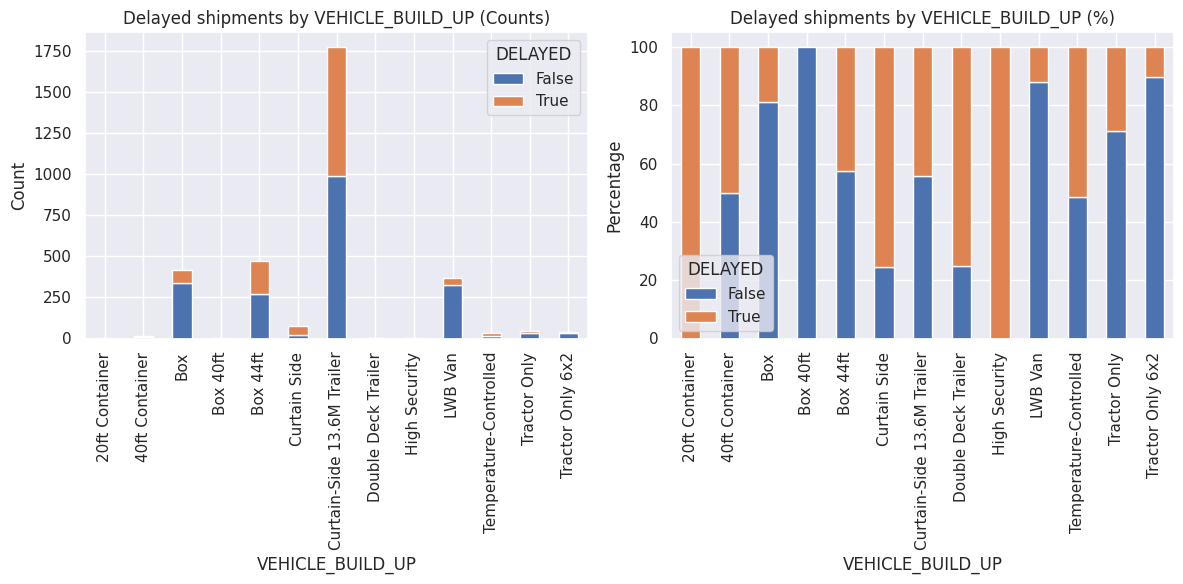

In [21]:
plot_bars("VEHICLE_BUILD_UP", data=shipment_bookings, figsize=(12, 6))

Differences between `VEHICLE_BUILD_UP` classifications aren't clear. In the real-world, a domain expert would give input into descriptions e.g. is `Box` the same as `Box 40ft` or `Box 44ft`, is `Curtain Side` the same as `Curtain Side 13.6M Trailer` etc. to determine how to handle this variable to better understand its predictive power.

In [24]:
# Remove shipments with distance 0
shipment_bookings = shipment_bookings[shipment_bookings['DISTANCE'] > 0]

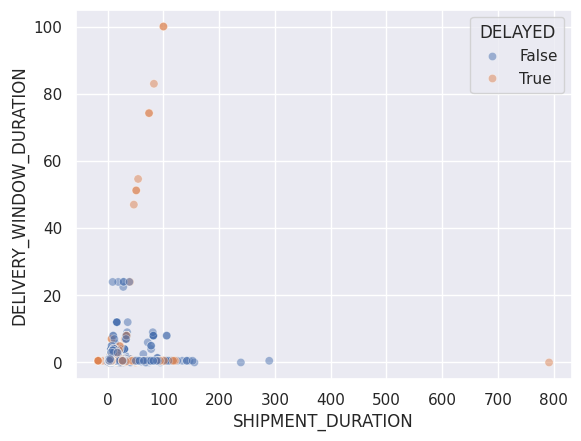

In [27]:

# Duration and delivery window length
sns.scatterplot(
    data=shipment_bookings,
    x="SHIPMENT_DURATION",
    y="DELIVERY_WINDOW_DURATION",
    hue="DELAYED",
    alpha=0.5,
)
plt.show()

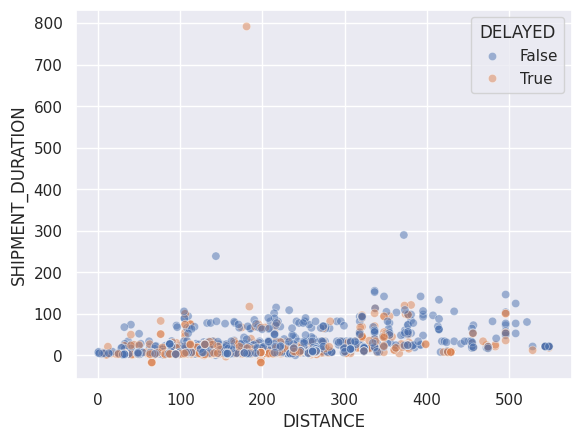

In [28]:
# Distance and shipment duration
sns.scatterplot(
    data=shipment_bookings,
    x="DISTANCE",
    y="SHIPMENT_DURATION",
    hue="DELAYED",
    alpha=0.5,
)
plt.show()

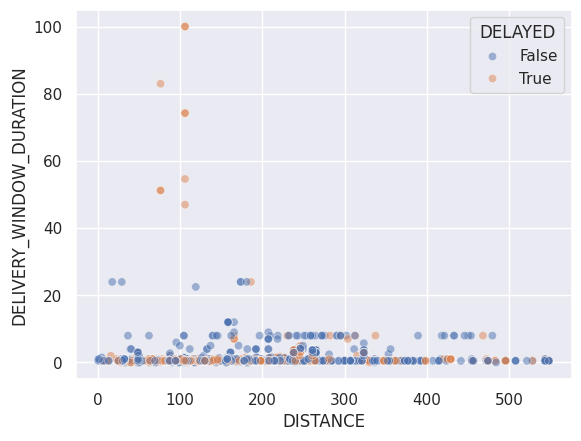

In [29]:
# Distance and Delivery window duration
sns.scatterplot(
    data=shipment_bookings,
    x="DISTANCE",
    y="DELIVERY_WINDOW_DURATION",
    hue="DELAYED",
    alpha=0.5,
)
plt.show()

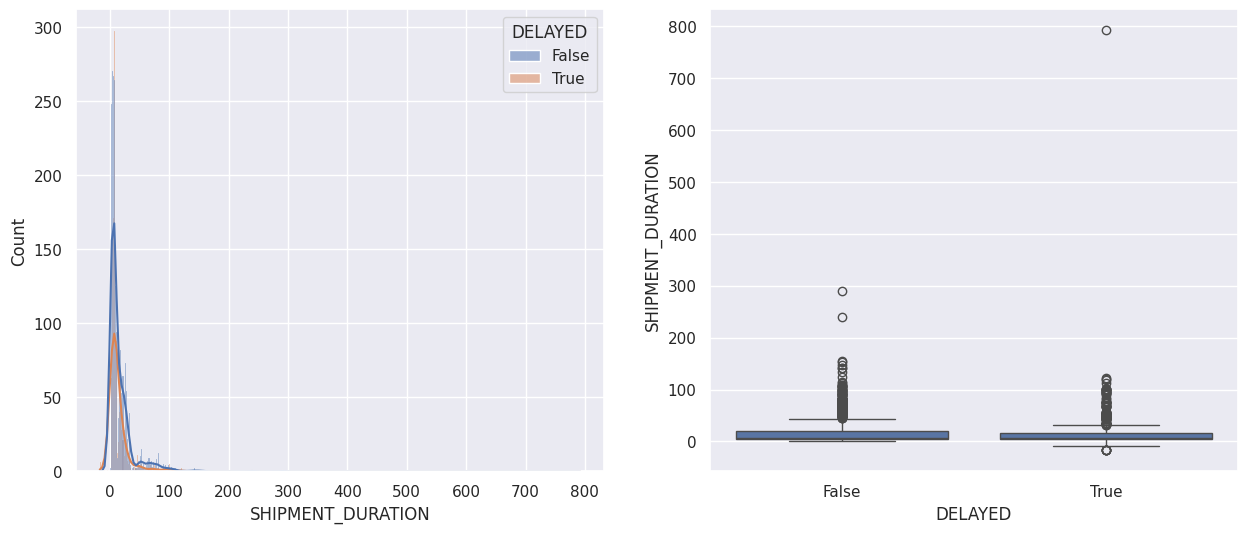

In [30]:
distplots("SHIPMENT_DURATION", data=shipment_bookings)

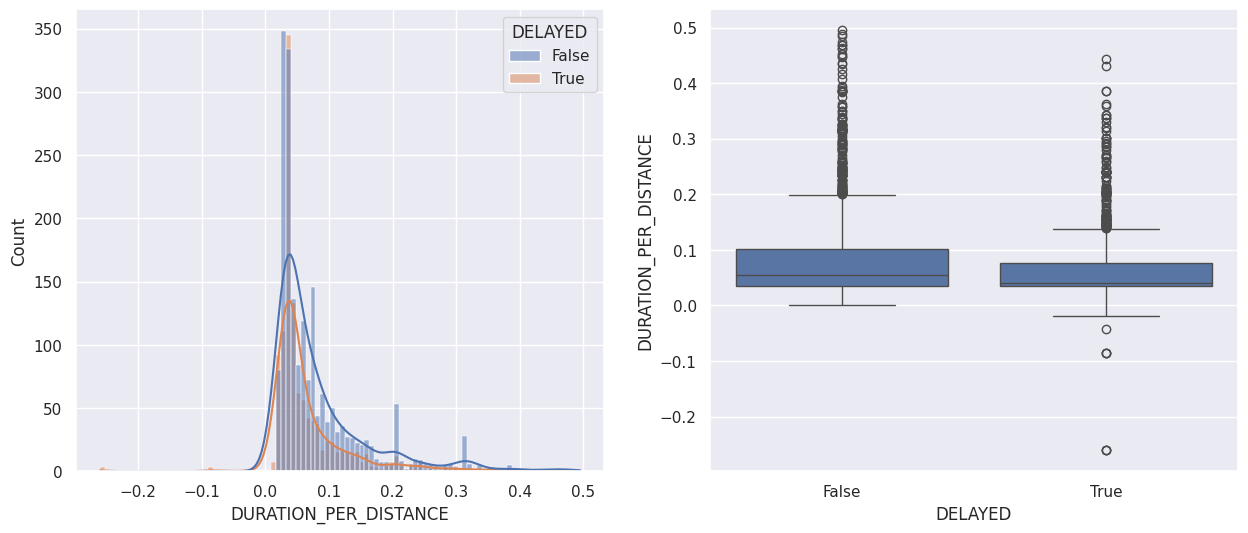

In [31]:
distplots("DURATION_PER_DISTANCE", data=shipment_bookings[shipment_bookings["DURATION_PER_DISTANCE"] <= 0.5])

In [32]:
# Drop delivery windows over 24 hours
shipment_bookings = shipment_bookings[
    shipment_bookings["DELIVERY_WINDOW_DURATION"] <= 24
]
# Drop shipment durations over 180 days
shipment_bookings = shipment_bookings[shipment_bookings["SHIPMENT_DURATION"] <= 180]

# Inspect 0 and negative shipment durations
shipment_bookings.loc[
    shipment_bookings["SHIPMENT_DURATION"] <= 0,
    [
        "SHIPMENT_NUMBER",
        "FIRST_COLLECTION_SCHEDULE_EARLIEST",
        "LAST_DELIVERY_SCHEDULE_LATEST",
        "SHIPMENT_DURATION",
    ],
]

,SHIPMENT_NUMBER,FIRST_COLLECTION_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,SHIPMENT_DURATION
319,SEZHUK-231220-276089,2023-12-21 19:00:00+00:00,2023-12-21 10:45:00+00:00,-8.25
456,SEZHUK-231215-274563,2023-12-16 10:00:00+00:00,2023-12-15 17:00:00+00:00,-17.00
537,SEZHUK-231215-274632,2023-12-17 20:00:00+00:00,2023-12-17 03:00:00+00:00,-17.00
802,SEZHUK-231215-274628,2023-12-16 10:00:00+00:00,2023-12-15 17:00:00+00:00,-17.00
850,SEZHUK-231215-274570,2023-12-17 18:00:00+00:00,2023-12-17 01:00:00+00:00,-17.00
1090,SEZHUK-231215-274639,2023-12-16 10:00:00+00:00,2023-12-15 17:00:00+00:00,-17.00
1857,SEZHUK-231018-253947,2023-10-18 14:00:00+00:00,2023-10-18 11:00:00+00:00,-3.00
2461,SEZHUK-231205-269918,2023-12-06 06:00:00+00:00,2023-12-06 06:00:00+00:00,0.00
3061,SEZHUK-231212-272610,2023-12-13 18:30:00+00:00,2023-12-13 01:30:00+00:00,-17.00


It's possible that these times have been switched over, but unless we know for certain, and as we have enough remaining data to play with, it's probably better to remove these from our training data.

In [33]:
# Drop 0 and negative shipment durations
shipment_bookings.drop(
    index=shipment_bookings[shipment_bookings["SHIPMENT_DURATION"] <= 0].index,
    inplace=True,
)

In [34]:
# Inspect rows with EARLIEST columns > LATEST columns
shipment_bookings.loc[
    (shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"]
    > shipment_bookings["FIRST_COLLECTION_SCHEDULE_LATEST"]) |
    (shipment_bookings["LAST_DELIVERY_SCHEDULE_EARLIEST"]
     > shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"]),
    [
        "SHIPMENT_NUMBER",
        "FIRST_COLLECTION_SCHEDULE_EARLIEST",
        "FIRST_COLLECTION_SCHEDULE_LATEST",
        "LAST_DELIVERY_SCHEDULE_EARLIEST",
        "LAST_DELIVERY_SCHEDULE_LATEST",
    ],
]


,SHIPMENT_NUMBER,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST
755,SEZHUK-231011-251901,2023-10-16 14:00:00+00:00,2023-10-16 12:56:00+00:00,2023-10-17 19:55:00+00:00,2023-10-17 20:25:00+00:00
874,SEZHUK-231026-256940,2023-10-27 14:00:00+00:00,2023-10-27 13:00:00+00:00,2023-10-28 00:01:00+00:00,2023-10-28 00:31:00+00:00


In [35]:
# Drop rows with EARLIEST columns > LATEST columns
shipment_bookings.drop(
    index=shipment_bookings[
        (shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"]
         > shipment_bookings["FIRST_COLLECTION_SCHEDULE_LATEST"]) |
        (shipment_bookings["LAST_DELIVERY_SCHEDULE_EARLIEST"]
         > shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"])
    ].index,
    inplace=True,
)

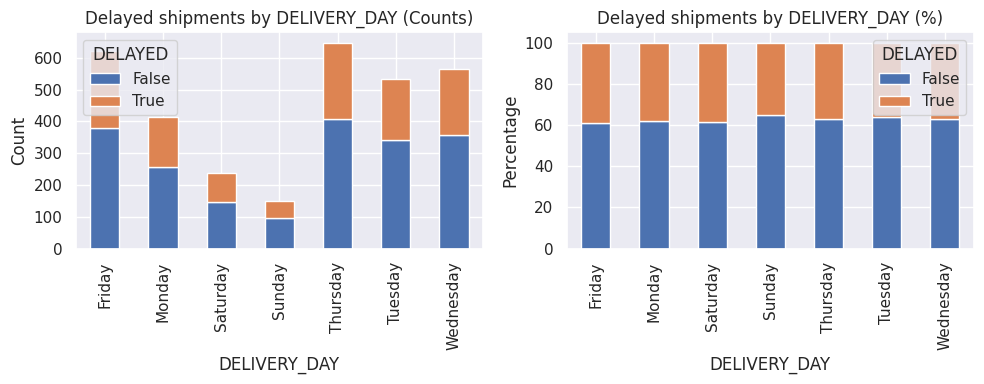

In [36]:
plot_bars("DELIVERY_DAY", data=shipment_bookings)
plt.show()

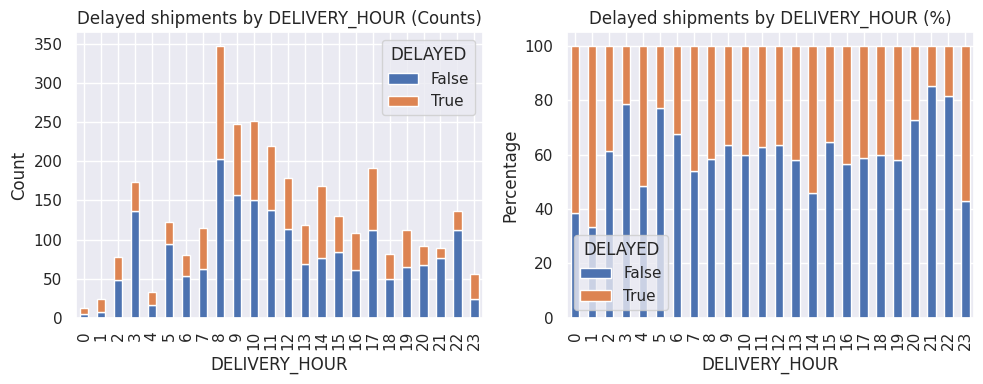

In [37]:
plot_bars("DELIVERY_HOUR", data=shipment_bookings)

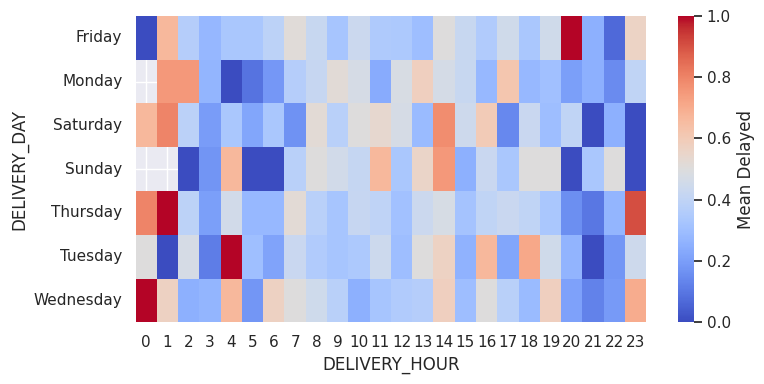

In [38]:
fix, ax = plt.subplots(figsize=(8, 4))
heatmap_data = shipment_bookings.groupby(['DELIVERY_DAY', 'DELIVERY_HOUR'])['DELAYED'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot(columns=['DELIVERY_HOUR'], index=['DELIVERY_DAY'], values='DELAYED')
sns.heatmap(heatmap_pivot, cmap="coolwarm", annot=False, fmt=".1f", cbar_kws={'label': 'Mean Delayed'})
plt.tight_layout()

/tmp/ipykernel_31640/1340262594.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shipment_bookings.groupby([duration_bins, window_bins])["DELAYED"].mean().unstack(),


<Axes: xlabel='DELIVERY_WINDOW_DURATION', ylabel='SHIPMENT_DURATION'>

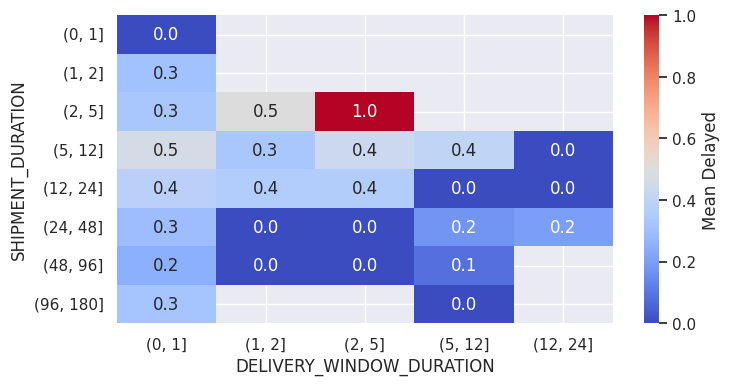

In [39]:
fix, ax = plt.subplots(figsize=(8, 4))
duration_bins = pd.cut(shipment_bookings["SHIPMENT_DURATION"], bins=[0, 1, 2, 5, 12, 24, 48, 96, 180])
window_bins = pd.cut(shipment_bookings["DELIVERY_WINDOW_DURATION"], bins=[0, 1, 2, 5, 12, 24])
sns.heatmap(
    shipment_bookings.groupby([duration_bins, window_bins])["DELAYED"].mean().unstack(),
    cmap="coolwarm",
    annot=True,
    fmt=".1f",
    cbar_kws={"label": "Mean Delayed"},
)

In [40]:
# Choose whether van or not
shipment_bookings["IS_VAN"] = (
    shipment_bookings["VEHICLE_SIZE"]
    .apply(lambda x: 1 if x == "3.5T Van" else 0)
    .rename("IS_3_5T_VAN")
)

In [41]:
numeric_shipment_bookings = shipment_bookings.select_dtypes(include='number')
numeric_shipment_bookings.head()

,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,DISTANCE,DELIVERY_HOUR,DELIVERY_WINDOW_DURATION,SHIPMENT_DURATION,DURATION_PER_DISTANCE,IS_VAN
0,52.315672,-0.157664,55.877803,-3.648558,456.706259,10,0.500000,72.666667,0.159110,0
1,53.764125,-1.740145,51.398851,-1.231993,265.236064,8,2.933333,18.600000,0.070126,0
2,53.767302,-1.746560,51.660700,-0.022247,261.440649,10,3.666667,9.383333,0.035891,0
3,51.779657,-0.772897,52.888113,-0.634948,123.610505,16,0.500000,7.000000,0.056629,0
4,52.334853,-1.180450,55.735089,-4.168719,425.385092,23,0.983333,9.983333,0.023469,0


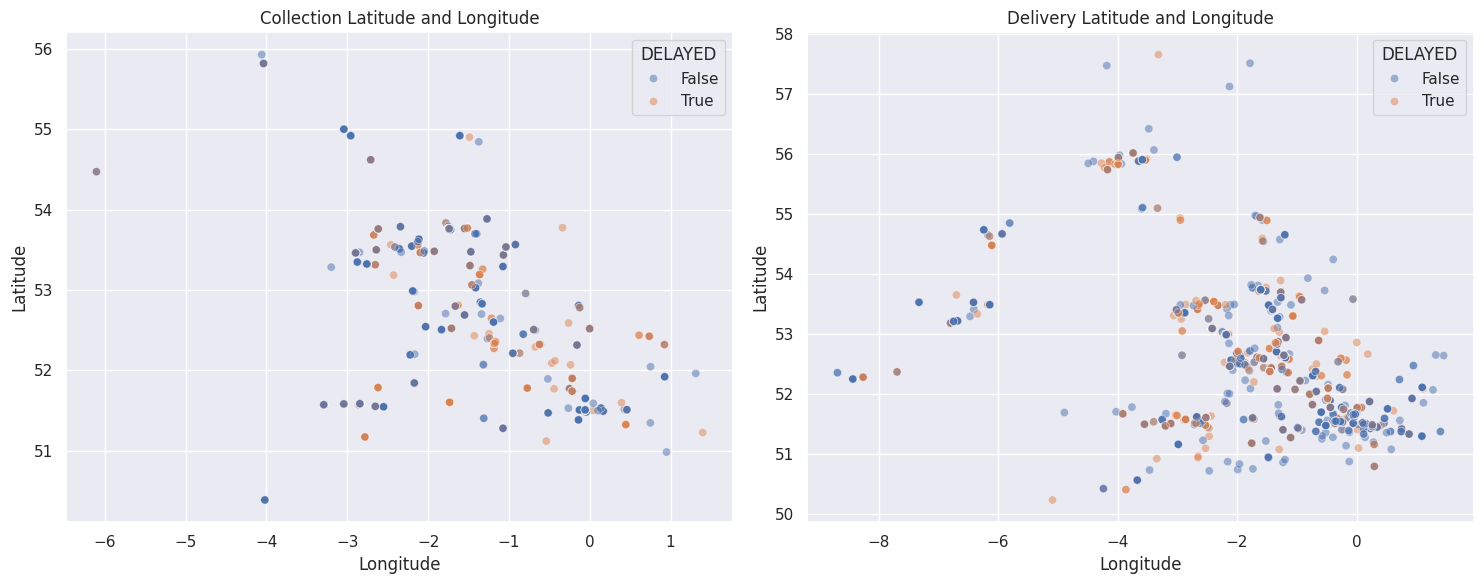

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for collection latitude and longitude
sns.scatterplot(
    data=shipment_bookings,
    x="FIRST_COLLECTION_LONGITUDE",
    y="FIRST_COLLECTION_LATITUDE",
    hue="DELAYED",
    alpha=0.5,
    ax=axes[0]
)
axes[0].set_title("Collection Latitude and Longitude")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Scatter plot for delivery latitude and longitude
sns.scatterplot(
    data=shipment_bookings,
    x="LAST_DELIVERY_LONGITUDE",
    y="LAST_DELIVERY_LATITUDE",
    hue="DELAYED",
    alpha=0.5,
    ax=axes[1]
)
axes[1].set_title("Delivery Latitude and Longitude")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

plt.tight_layout()
plt.show()

Lat/Lon does not appear correlated

In [43]:
# Drop lat/lon information
numeric_shipment_bookings = numeric_shipment_bookings.drop(
    columns=[
        "FIRST_COLLECTION_LATITUDE",
        "FIRST_COLLECTION_LONGITUDE",
        "LAST_DELIVERY_LATITUDE",
        "LAST_DELIVERY_LONGITUDE",
    ]
)
numeric_shipment_bookings.head()

,DISTANCE,DELIVERY_HOUR,DELIVERY_WINDOW_DURATION,SHIPMENT_DURATION,DURATION_PER_DISTANCE,IS_VAN
0,456.706259,10,0.500000,72.666667,0.159110,0
1,265.236064,8,2.933333,18.600000,0.070126,0
2,261.440649,10,3.666667,9.383333,0.035891,0
3,123.610505,16,0.500000,7.000000,0.056629,0
4,425.385092,23,0.983333,9.983333,0.023469,0


In [44]:
numeric_shipment_bookings = numeric_shipment_bookings.merge(
    pd.DataFrame(shipment_bookings["DELAYED"].map({False: 0, True: 1})),
    left_index=True,
    right_index=True
)

In [45]:
numeric_shipment_bookings["DELAYED"].mean()

np.float64(0.37397346809854703)